---
## Heart Disease Dataset - Exploratory Data Analysis (EDA)

# Introduction  
### Heart Disease Prediction: IoT-Compatible Features*

In this project, we are building a heart disease prediction model using IoT devices. Since IoT devices cannot perform complex medical tests, we are selecting features that can be measured using basic sensors and dropping features that require **laboratory tests** or specialized medical procedures.


### **Objectives of this Notebook**
1. **Understand the dataset** – Identify its structure, features, and data types.
2. **Handle missing values** – Check for null values and decide how to handle them.
3. **Perform statistical analysis** – Generate summary statistics for numerical and categorical features.
4. **Visualize key patterns** – Use different types of graphs to identify trends and relationships.
5. **Prepare for modeling** – Clean and preprocess data for machine learning models.



###  **Step 1: Importing Required Libraries**  
Before we dive into the analysis, we first **import the necessary Python libraries** that will help us handle data, perform computations, and visualize patterns effectively.

---

In [1]:
# Importing Required Libraries for EDA on Heart Disease Dataset

# Data Handling
import pandas as pd       # For reading and manipulating datasets
import numpy as np        # For numerical operations and computations

# Data Visualization
import matplotlib.pyplot as plt  # For creating basic plots
import seaborn as sns     # For advanced data visualization with statistical insights

# Warning Handling
import warnings           
warnings.simplefilter("ignore")  # Suppress warnings for a cleaner output

# Configurations for better plots
sns.set_style("whitegrid")  # Improve aesthetics of Seaborn plots
plt.rcParams["figure.figsize"] = (10, 6)  # Set default figure size for plots

# Additional Libraries
import plotly.express as px # For interactive plots only


---
## Step 2: Loading the Heart Disease Dataset  

Now that we have imported the necessary libraries, the next step is to **load our dataset into the system** for analysis.

### **Where Does the Data Come From?**
This dataset is commonly used in heart disease prediction studies and contains various patient attributes, such as:
- **Age, Sex, Blood Pressure, Cholesterol Levels**
- **Chest Pain Type, Fasting Blood Sugar, Resting ECG Results**
- **Maximum Heart Rate, Exercise-Induced Angina, and more**

### **How Will We Load the Data?**
1. Use `pandas` to read the dataset file (usually in **CSV format**).
2. Display the first few rows to understand the structure of the data.
3. Check for basic details like **column names, data types, and missing values**.
 
---

In [2]:
# Import that dataset into the notebook

df = pd.read_csv('data/heart_disease_uci.csv')

# Display the first few rows of the dataset
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Initial Data Exploration  

Now that we have loaded the dataset, let’s **perform an initial check** to understand its structure.

###  **Key Checks**
1. **Preview the first few rows** using `df.head()`.
2. **Check dataset size** using `df.shape` (number of rows & columns).
3. **Get column names and data types** using `df.info()`.
4. **Check for missing values** using `df.isnull().sum()`.
5. **Look at summary statistics** using `df.describe()`.


## Next Step: Understanding the Data Structure  
We will now explore the dataset to see if there are **missing values**, **incorrect data types**, or **outliers** that may need cleaning.


In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.shape

(920, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       0
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [7]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


<Axes: >

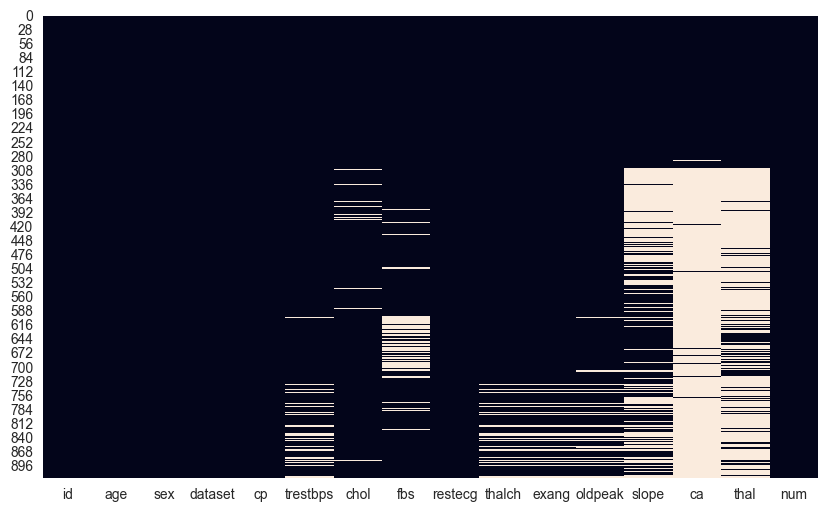

In [8]:
# visualize missing values in the data set to better understand the data 
sns.heatmap(df.isnull(), cbar=False)

Looking at the heatmap, we can see that there are many missing values in the 'ca', 'thal', and 'slope' columns. We will need to handle these missing values appropriately. 

Ca represents the number of major vessels (0-3) colored by fluoroscopy. Thal represents the thalium stress result. Slope represents the slope of the peak exercise ST segment.

EDA Analysis of each column in the dataset for heart disease

---

### Step 3: Exploring & Cleaning Each Column  

Now that we have loaded the dataset, we will analyze and clean each column **independently**.  
This is essential to **ensure data consistency**, **handle missing values**, and **prepare it for further analysis**.

#### **Process for Each Column**
For each column, we will:
1. **Understand its meaning and significance** in heart disease prediction.
2. **Check the data type** to ensure it is correctly formatted.
3. **Identify missing values** and decide how to handle them.
4. **Look for outliers or unusual values** and determine if they need correction.
5. **Transform the data if needed** (e.g., encoding categorical variables).
---


### Column: `age`
 **Definition:**  
> This column represents the age of the patient in years.

 **Data Type:**  
- Expected: **Integer**
- Current: *Check using `df.dtypes`*

 **Key Checks:**
- Unique values: `df["age"].unique()`
- Missing values: `df["age"].isnull().sum()`
- Summary statistics: `df["age"].describe()`

 **Potential Issues & Fixes:**
| Issue                  | Solution |
|------------------------|----------|
| Missing values?        | Fill with median age |
| Incorrect data types?  | Convert using `.astype(int)` |
| Outliers?             | Check values below 28 or above 80 |


In [9]:

# Ensuring correct data type
df["age"] = df["age"].astype(int)

In [10]:
# look out for num values in the data set 
df['age'].isnull().sum()

0

In [11]:
# Get a statistical description of the age column
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

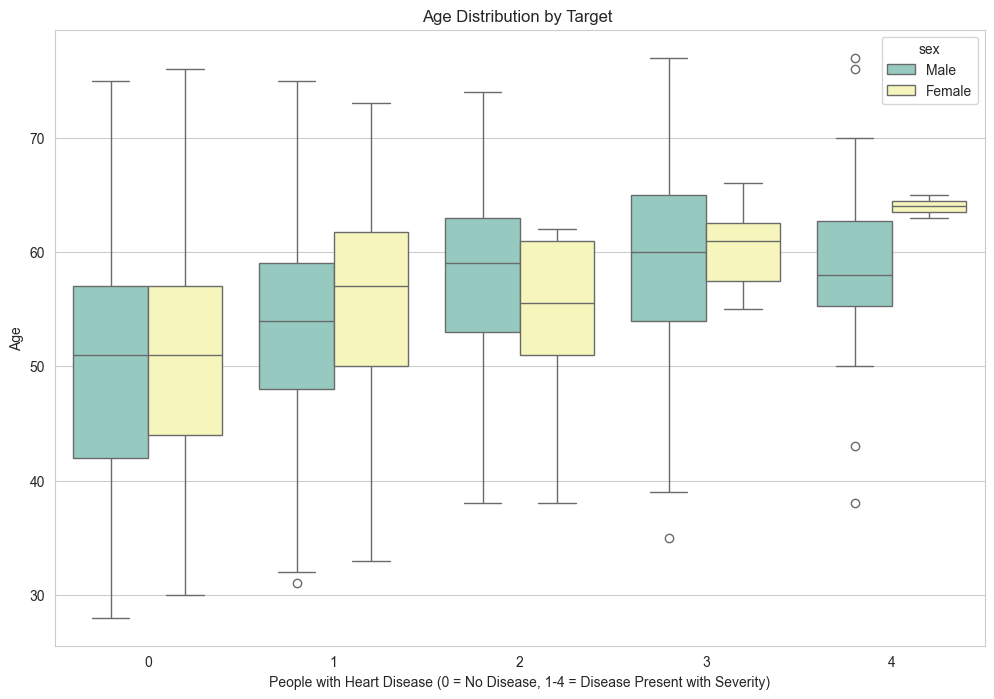

In [12]:
# plot the age distribution by target 
plt.figure(figsize=(12,8))
sns.boxplot(x='num', y='age', data=df , palette='Set3', hue='sex')
plt.xlabel('People with Heart Disease (0 = No Disease, 1-4 = Disease Present with Severity)')
plt.ylabel('Age')
plt.title('Age Distribution by Target ') 
plt.show()

From the observation, it can be seen that -: 
- Majority of people are between 54 and 64 years old.
- The distribution of people with heart disease is slightly higher in older age groups.
- The youngest person in the data set is 28 and the oldest person in the data set is 77 years old.
- most of the outliers in the data set with the serious heart condition are actually male and much younger, below the age of 50.
- Age has no missing values in the data set. 


---




### sex Column ###

Lets see the distribution of the target variable by sex.

In [13]:
df['sex'].isnull().sum()


0

In [14]:
# get the unique values
sex_list = df['sex'].unique()

print('Sex List:', sex_list)

Sex List: ['Male' 'Female']


In [15]:
# count of people with heart disease by sex
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

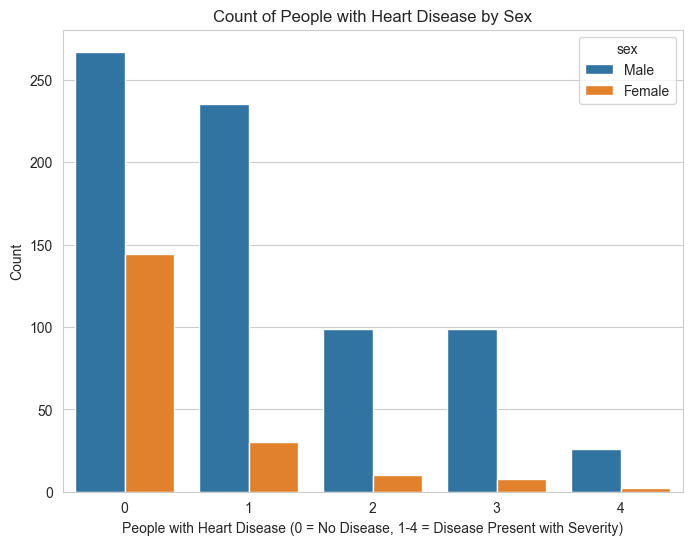

In [16]:
# plot the count of people with heart disease by sex
plt.figure(figsize=(8,6))
sns.countplot(x='num', hue='sex', data=df)
plt.xlabel('People with Heart Disease (0 = No Disease, 1-4 = Disease Present with Severity)')
plt.ylabel('Count')
plt.title('Count of People with Heart Disease by Sex')
plt.show()

In [17]:
# print the count of people with heart disease by sex 
df[df['num'] > 0].value_counts().groupby('sex').sum()

sex
Female     25
Male      114
Name: count, dtype: int64

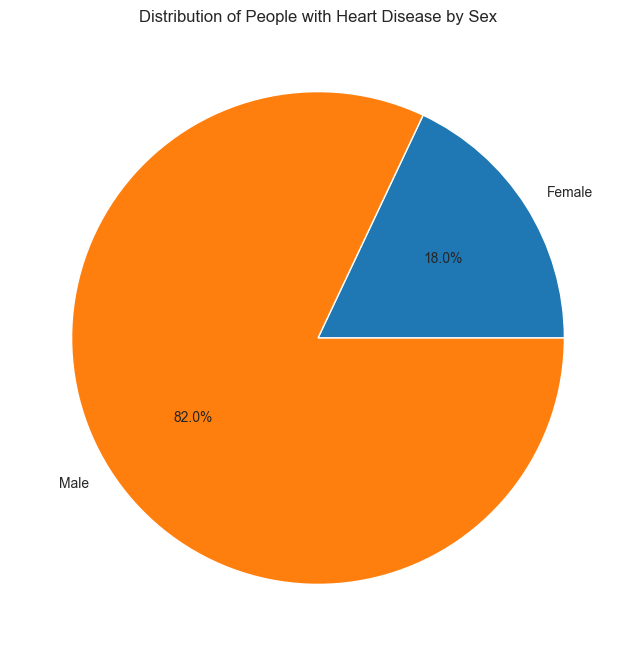

In [19]:
# plot a q of age pie chart with heart condition being 1 and above categorized by sex 
plt.figure(figsize=(12,8))
plt.pie(df[df['num'] >= 1].value_counts().groupby('sex').sum(), labels=['Female', 'Male'], autopct='%1.1f%%')
plt.title('Distribution of People with Heart Disease by Sex') 
plt.show()

From the observations, we can see that the dataset is showing more males with heart disease than females. This is also reflected in the count of people with heart disease by sex. The number of males with heart disease is more than the number of females with heart disease.
- More Males are likely to have heart condition than females are. 


Note:
- Research shows that along with typical risk factors—such as high blood pressure, high cholesterol, and diabetes—men are at increased risk of heart attack earlier in life due to hormone changes, abdominal obesity, and emotional challenges in middle adulthood. 

### dataset Color Analysis

Now let's visualize the dataset color by target.

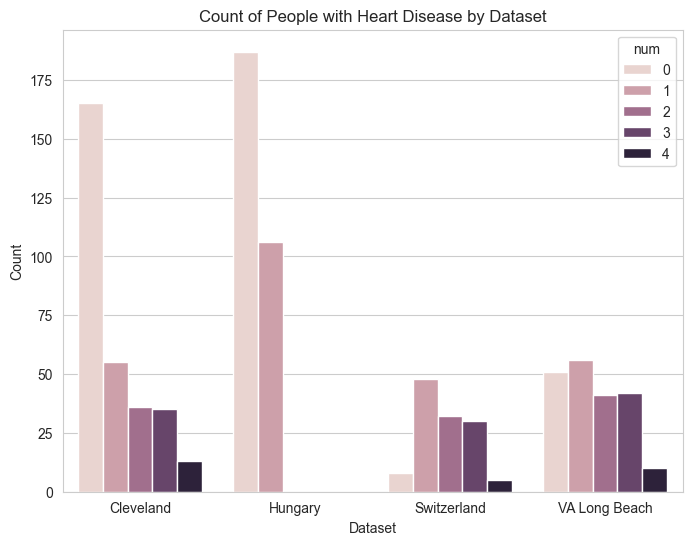

In [20]:
# plot the distribution of people with heart disease by dataset 
plt.figure(figsize=(8,6))
sns.countplot(x='dataset', hue='num', data=df)
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.title('Count of People with Heart Disease by Dataset')
plt.show()

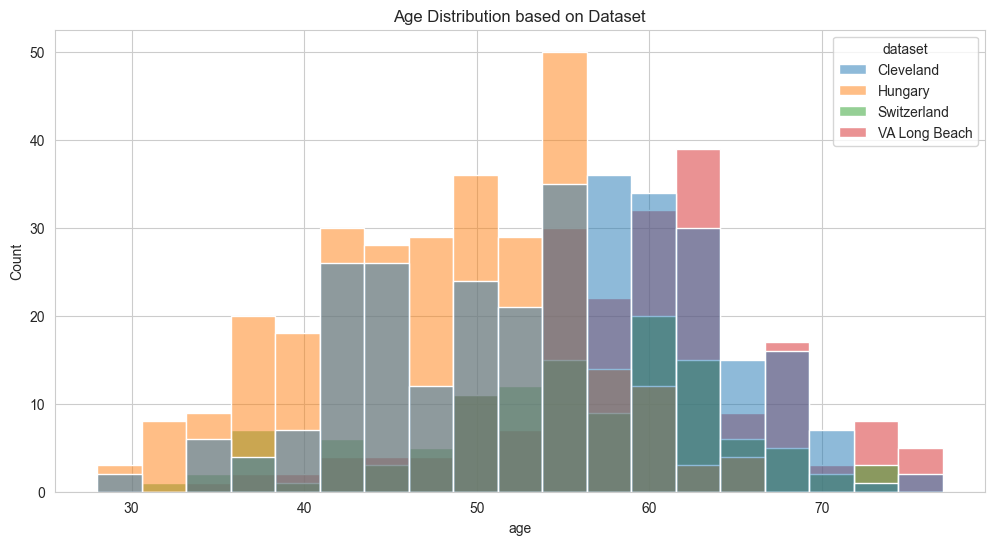

In [21]:
# histplot using seaborn

fig = plt.figure(figsize=(12,6))
sns.histplot(df,x='age',hue='dataset')
plt.title('Age Distribution based on Dataset')
plt.show()

### cp column
chest pain type (4 values)

- Asymptomatic: Asymptomatic means that individuals do not exhibit the typical symptoms associated with heart problems, such as chest pain.

- Non-Anginal Chest Pain: Non-anginal chest pain refers to discomfort that deviates from the typical pattern of angina. It may not be triggered by physical activity and can have various characteristics.

- Atypical Angina: Atypical angina maintains a connection to the heart but diverges from the classic symptoms commonly associated with typical angina. It may have different qualities compared to the usual anginal pain.

- Angina and Heart Disease: Angina is closely entwined with heart disease. It serves as a symptom, signaling an underlying issue with the blood supply to the heart. Typically associated with coronary artery disease (CAD), angina indicates a potential lack of oxygen and nutrients reaching the heart muscle, urging individuals to seek prompt medical attention.


Let's see the distribution of the target variable by chest pain type.

In [22]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

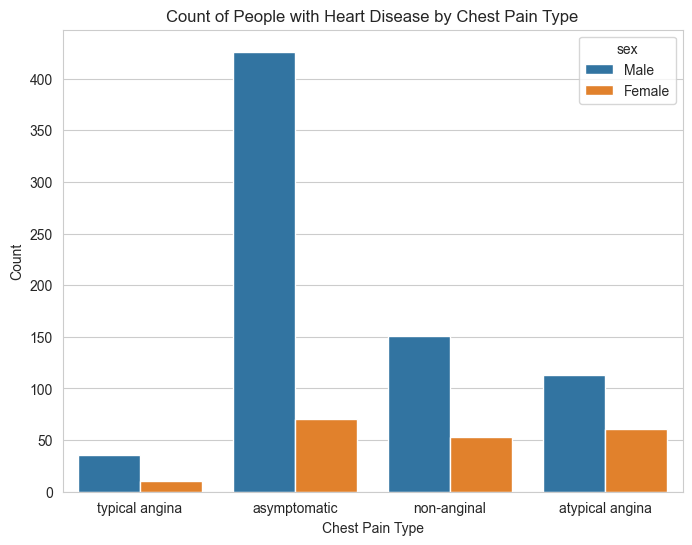

In [23]:
# visualize the distribution of chest pain type
plt.figure(figsize=(8,6))
sns.countplot(x='cp', hue='sex', data=df)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Count of People with Heart Disease by Chest Pain Type')
plt.show()

In [24]:


# histogram of cp based on age

fig = px.histogram(df,x='age',title='CP Distribution',color='cp')
fig.update_layout(width=1200, height=600)
fig.show()



In [25]:
# print mean, median and mode

print('Mean',df.groupby('cp')['age'].mean())
print('-------------------')
print('Median',df.groupby('cp')['age'].median())
print('-------------------')
print('Mode',df.groupby('cp')['age'].agg(pd.Series.mode))

Mean cp
asymptomatic       54.959677
atypical angina    49.241379
non-anginal        53.333333
typical angina     54.826087
Name: age, dtype: float64
-------------------
Median cp
asymptomatic       56.0
atypical angina    50.5
non-anginal        53.5
typical angina     59.0
Name: age, dtype: float64
-------------------
Mode cp
asymptomatic             57
atypical angina          54
non-anginal        [51, 54]
typical angina           62
Name: age, dtype: object


In [26]:
fig = px.sunburst(df,path=['dataset','cp'])
fig.show()

### Chest Pain Type Distribution
- Asymptomatic → 🏥 496 patients (Most people showed no typical signs of heart problems, like chest pain.)
- Non-anginal Pain → 🤕 204 patients (Experienced chest discomfort, but not the typical pain associated with heart issues.)
- Atypical Angina → 💢 174 patients (Experienced chest discomfort, but it differs from typical angina symptoms.)
- Typical Angina → ❤️ 46 patients (Experienced chest pain commonly associated with heart problems.)



---


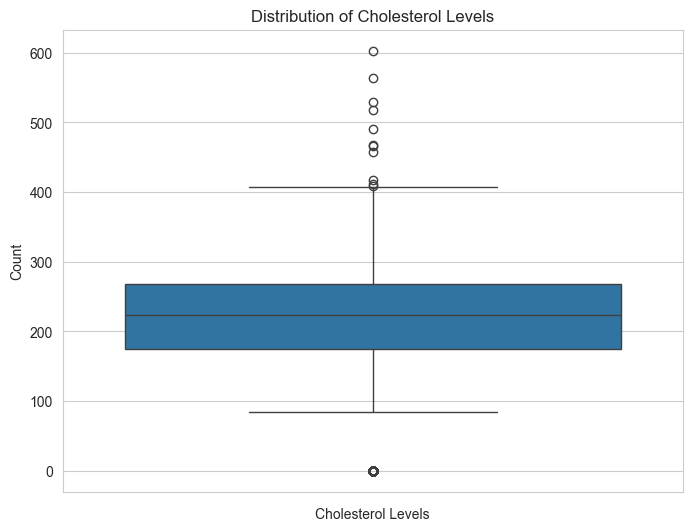

In [27]:
# get to check if there are any outliers in chol
plt.figure(figsize=(8,6))
sns.boxplot(df['chol'])
plt.xlabel('Cholesterol Levels')
plt.ylabel('Count')
plt.title('Distribution of Cholesterol Levels')
plt.show()

In [28]:
# create a histogram of the distribution of cholesterol levels we need to also show the 
fig = px.bar(df, x="age", y="chol", color="sex", hover_data=['age', 'cp', 'num'], title="Cholesterol Levels by Age and Sex") 
fig.show()

In [29]:
# box plot of chol by age and sex
plt.figure(figsize=(12,8))
fig = px.box(df, x="age", y="chol" , color="sex", hover_data=['age', 'cp', 'num'], title="Cholesterol Levels by Age and Sex") 
fig.show()

<Figure size 1200x800 with 0 Axes>

###  fbs (if fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- Fasting blood sugar (1 = true; 0 = false)

Let's see the distribution of the target variable by fasting blood sugar levels.



In [31]:
# get all info on fbs
df['fbs'].value_counts()

fbs
False    692
True     138
Name: count, dtype: int64

In [32]:
# show the first 5 rows of the fbs column
df['fbs'].head()

0     True
1    False
2    False
3    False
4    False
Name: fbs, dtype: object

In [33]:
# plotting the pie chart
fig = px.pie(df, names='fbs', title='Distribution of Fasting Blood Sugar')
fig.show()
 

### thalach: maximum heart rate achieved
- Maximum heart rate achieved (numeric)

Let's see the distribution of the target variable by maximum heart rate achieved.


In [34]:
# get the first 5 rows of the thalach column
df['thalch'].head()

0    150.0
1    108.0
2    129.0
3    187.0
4    172.0
Name: thalch, dtype: float64

In [35]:
# can we see that the maximum heart rate achieved is not provided for all entries.
df['thalch'].max()

202.0

In [36]:
# we will fill the missing values with the mean of thalach
df['thalch'].isnull().sum()

55

In [37]:
# can we the Scatter Plot to see the relationship between age and maximum heart rate achieved
# plotting the scatter chart
fig = px.scatter(df, x="age", y="thalch", color="sex", hover_data=['age', 'cp', 'num'], title="Maximum Heart Rate Achieved by Age and Sex") 
 
# showing the plot
fig.show()

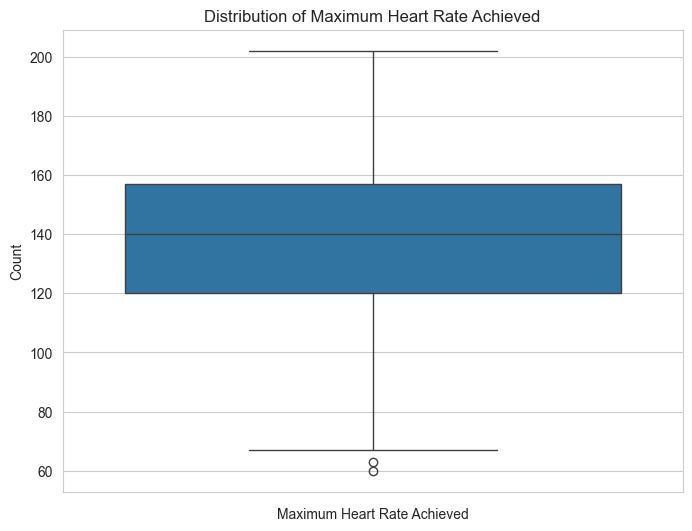

In [39]:
# look for outliers in thalach
plt.figure(figsize=(8,6))
sns.boxplot(df['thalch'])
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Count')
plt.title('Distribution of Maximum Heart Rate Achieved')
plt.show()

The data raises some outliers in the dataset seem to be falling below the lower whisker. 

In [40]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       0
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

### restceg 

The restecg column in your dataset represents the resting electrocardiographic results of patients. This variable provides information about the patient's heart condition during rest and can have the following possible values:
- Normal: The electrocardiogram (ECG) shows no abnormalities, meaning the heart's electrical activity appears normal during rest.
- ST-T wave abnormality: This indicates a problem in the heart's electrical activity, potentially related to issues like ischemia (reduced blood flow to the heart) or other heart conditions that could lead to changes in the ST segment or T waves in the ECG.
- Left ventricular hypertrophy (LV hypertrophy): This refers to thickening of the left ventricle of the heart, which can be caused by high blood pressure or other cardiovascular conditions. It can be detected by changes in the ECG related to the increased thickness of the heart's muscle.

Let's see the distribution of the target variable by resting electrocardiographic results.

In [41]:
# fill in the missing values in restecg with the mode
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)

In [42]:
# visual the distribution of restecg
fig = px.bar(df, x="restecg", color="num", title="Distribution of Heart Disease by Resting Electrocardiographic Results", 
             labels={"restecg": "Resting ECG Result", "Target": "Heart Disease (1 = Yes, 0 = No)"}, 
             category_orders={"restecg": ["normal", "stt abnormality", "lv hypertrophy"]})

fig.show()

In [43]:
# Create a stacked bar plot for distribution of the target by resting ECG results
fig = px.histogram(df, x="restecg", color="num", 
                   category_orders={"restecg": ["normal", "stt abnormality", "lv hypertrophy"]},
                   barmode="stack", 
                   title="Distribution of Heart Disease by Resting Electrocardiographic Results",
                   labels={"restecg": "Resting ECG Result", "num": "Heart Disease (1 = Yes, 0 = No)"},
                   color_discrete_map={0: "lightblue", 1: "darkred"})

# Add percentages to the bars
fig.update_traces(texttemplate='%{value}', textposition='inside', insidetextfont=dict(color="white"))

# Update layout for a cleaner, more informative look
fig.update_layout(
    xaxis_title="Resting Electrocardiographic Results",
    yaxis_title="Count of Individuals",
    barmode="stack",
    plot_bgcolor="white",
    showlegend=True,
    legend_title="Heart Disease (num)",
)

# Show the plot
fig.show()

### observsation 

- the number of patients with heart disease who have a normal resting ECG result is significantly higher than those with other ECG results.
- the number of patients with heart disease who have a ST-T wave abnormality result is also higher than those with other ECG results.
- The number of patients with heart disease who have a left ventricular hypertrophy result is relatively lower compared to the other ECG results.


---

### Get only needed Columns


Now get only columns we shall us with the data from the IOT sensor to be able to track and monitor patients with Heart disease.



### 1. Dropped Features
These features require laboratory tests or advanced medical equipment, making them unsuitable for IoT-based predictions.

| Feature Name  | Description | Reason for Dropping |
|-------------------|----------------|-------------------------|
| cp (Chest Pain Type) | Type of chest pain experienced | Requires patient-reported input, not sensor-based |
| chol (Serum Cholesterol) | Level of cholesterol in mg/dL | Needs blood test |
| fbs (Fasting Blood Sugar) | Blood sugar level > 120 mg/dL | Requires blood test |
| thal (Thalassemia) | Blood disorder classification | Needs a special medical scan |
| slope (ST Segment Slope) | Slope of peak exercise ST segment | Requires an ECG test |
| ca (Number of Major Vessels) | Number of major blood vessels colored by fluoroscopy | Needs fluoroscopy (X-ray test) |
| thalach (Maximum Heart Rate) | Maximum heart rate achieved during stress test | Requires treadmill stress test |
| oldpeak (ST Depression) | ST depression induced by exercise | Requires ECG test |




### 2. Kept Features
These features can be measured using IoT sensors and are useful for predicting heart disease.

| Feature Name  | Description | Reason for Keeping |
|-------------------|----------------|-------------------------|
| age | Age of the patient | Can be provided manually or from a database |
| sex | Gender (1 = Male, 0 = Female) | Can be entered manually |
| trestbps (Resting Blood Pressure) | Blood pressure in mmHg | Can be measured using a BP sensor |
| thalach (Max Heart Rate Achieved) | Maximum heart rate during activity | Wearable fitness trackers can measure this |
| restecg (Resting Electrocardiographic Results) | ECG results (0, 1, 2) | Can be recorded using wearable ECG sensors |
| exang (Exercise-Induced Angina) | 1 = Yes, 0 = No | Can be inferred from wearable activity monitors |
| oldpeak (ST Depression) | Measure of heart stress | Can be approximated using heart rate variability |



### Conclusion
By selecting IoT-compatible features, we ensure that our heart disease prediction model works with real-world sensor data without requiring lab tests. This enables practical implementation in areas with limited access to medical facilities. 


---

In [44]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [45]:
ioT_Readable = ['age', 'sex', 'trestbps', 'thalch', 'restecg', 'exang', 'oldpeak', 'num']


# get only needed Column for the IoT
df_IoT = df[ioT_Readable]




### Data Engineering

1. Standardization: We'll standardize the numerical columns to ensure that they are on a similar scale. This will help in better interpretation of the data.
2. Encoding: We'll encode categorical variables using one-hot encoding or label encoding.




In [46]:
df_IoT.head()

,age,sex,trestbps,thalch,restecg,exang,oldpeak,num
0,63,Male,145.0,150.0,lv hypertrophy,False,2.3,0
1,67,Male,160.0,108.0,lv hypertrophy,True,1.5,2
2,67,Male,120.0,129.0,lv hypertrophy,True,2.6,1
3,37,Male,130.0,187.0,normal,False,3.5,0
4,41,Female,130.0,172.0,lv hypertrophy,False,1.4,0


In [47]:
df_IoT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   trestbps  861 non-null    float64
 3   thalch    865 non-null    float64
 4   restecg   920 non-null    object 
 5   exang     865 non-null    object 
 6   oldpeak   858 non-null    float64
 7   num       920 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 57.6+ KB


In [48]:
# look at missing data 
df_IoT.isnull().sum()

age          0
sex          0
trestbps    59
thalch      55
restecg      0
exang       55
oldpeak     62
num          0
dtype: int64

In [49]:
#  make sure to fill the missing data in the columns with the mean or mode 

df_IoT['trestbps'].fillna(df_IoT['trestbps'].mean(), inplace=True)
df_IoT['thalch'].fillna(df_IoT['thalch'].mean(), inplace=True)
df_IoT['exang'].fillna(df_IoT['exang'].mode()[0], inplace=True)
df_IoT['oldpeak'].fillna(df_IoT['oldpeak'].mean(), inplace=True)

In [50]:
df_IoT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   trestbps  920 non-null    float64
 3   thalch    920 non-null    float64
 4   restecg   920 non-null    object 
 5   exang     920 non-null    bool   
 6   oldpeak   920 non-null    float64
 7   num       920 non-null    int64  
dtypes: bool(1), float64(3), int64(2), object(2)
memory usage: 51.3+ KB


In [51]:
# to preprocess the data 
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer

# Machine Learning
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

# For classification tasks 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier,RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

# metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , mean_absolute_error  , mean_squared_error , r2_score

# to save the model 
import pickle


In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [53]:
# label encoding 

label_encoder = LabelEncoder()

df_IoT['sex'] = label_encoder.fit_transform(df_IoT['sex'])
df_IoT['restecg'] = label_encoder.fit_transform(df_IoT['restecg'])
df_IoT['exang'] = label_encoder.fit_transform(df_IoT['exang'])
df_IoT.head()

,age,sex,trestbps,thalch,restecg,exang,oldpeak,num
0,63,1,145.0,150.0,0,0,2.3,0
1,67,1,160.0,108.0,0,1,1.5,2
2,67,1,120.0,129.0,0,1,2.6,1
3,37,1,130.0,187.0,1,0,3.5,0
4,41,0,130.0,172.0,0,0,1.4,0


In [54]:
# for the num values, anything beyond 0, will be marked as positive and 0 means negative

df_IoT['num'] = df_IoT['num'].apply(lambda x: 1 if x > 0 else 0)

In [55]:
# split the data into features and target
X = df_IoT.drop('num', axis=1)
y = df_IoT['num']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
# import the X_test dataset 
X_test_data = pd.read_csv('X_test.csv')


In [57]:
# read thee data add the timestamp to the dataset starting from 1 to end of the file 
X_test_data['timestamp'] = range(1, len(X_test_data) + 1)
X_test_data.head()

# save the data to a csv file
X_test_data.to_csv('X_test_data.csv', index=False)

In [58]:
# scale the data using minMax scaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
#  Logistic Regression
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # SAGA can handle both L1 and L2
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)

# Use the best model
log_reg = grid_search.best_estimator_
log_reg.fit(X_train_scaled, y_train)


log_reg = LogisticRegression(class_weight='balanced', C=0.01, solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')

precision = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.7989130434782609
F1 Score: 0.8006443310653191
Precision: 0.815985349716446
Recall: 0.7989130434782609
MAE: 0.20108695652173914
MSE: 0.20108695652173914
R2: 0.16721712538226297


In [60]:
# predict the first same in the training set 
log_reg.predict(X_train_scaled[2].reshape(1, -1))


array([0])

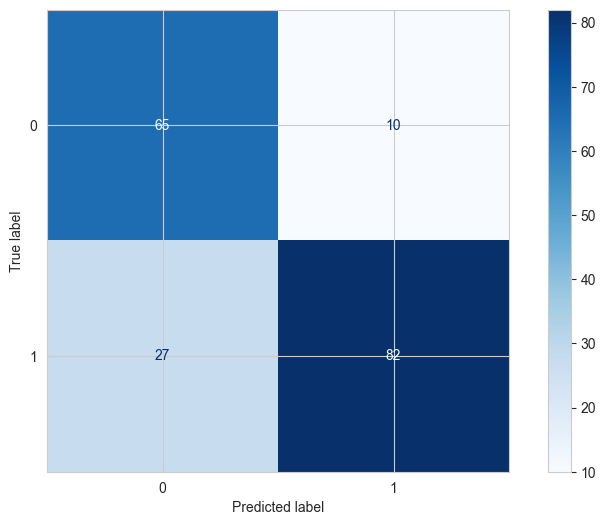

In [61]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [62]:
# kNNs 
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')

precision = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

Accuracy: 0.75
F1 Score: 0.7521472026720745
Precision: 0.7655973059198865
Recall: 0.75
MAE: 0.25
MSE: 0.25
R2: -0.03535168195718663


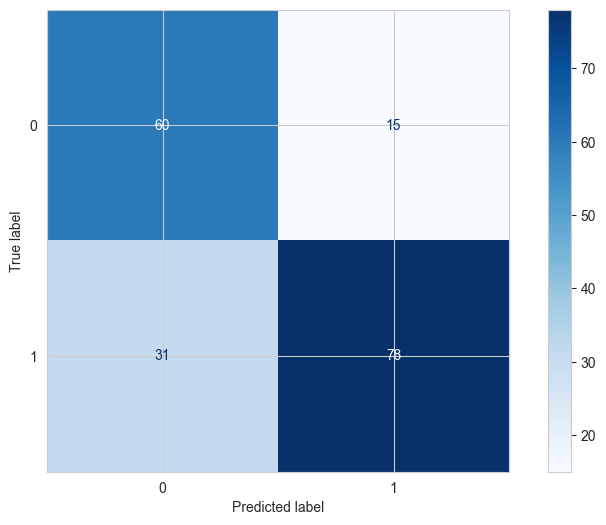

In [63]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [64]:
# Support Vector Machine
svc = SVC(C=1.0, kernel='linear')

svc.fit(X_train_scaled, y_train)

y_pred = svc.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')

precision = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

Accuracy: 0.7771739130434783
F1 Score: 0.7784452062615416
Precision: 0.7819680098974903
Recall: 0.7771739130434783
MAE: 0.22282608695652173
MSE: 0.22282608695652173
R2: 0.0771865443425076


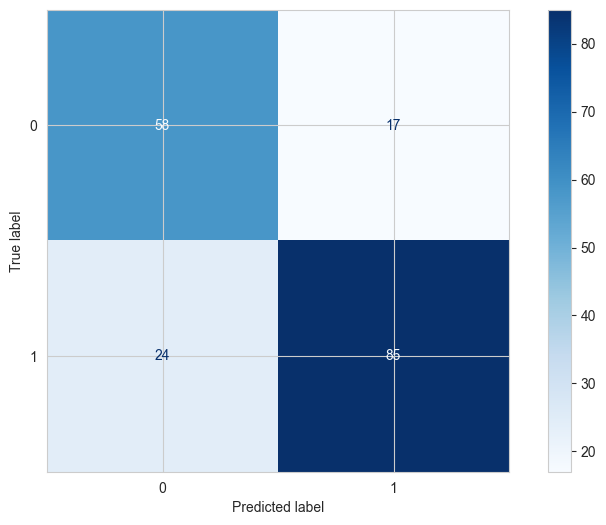

In [65]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [66]:
# Decision Tree

# Initialize Decision Tree Classifier with complex parameters
dt_model = DecisionTreeClassifier(
    criterion='entropy',        
    max_depth=11,               
    min_samples_split=20,        
    min_samples_leaf=3,         
    max_features='sqrt',        
    random_state=42
)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)


Accuracy: 0.7228260869565217
F1 Score: 0.7249302367449815
Precision: 0.7321750995645984
Recall: 0.7228260869565217
MAE: 0.27717391304347827
MSE: 0.27717391304347827
R2: -0.14788990825688075


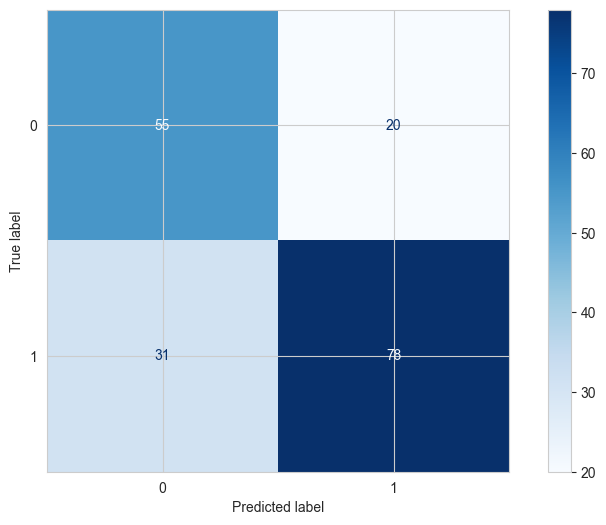

In [67]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [68]:
# using grid search

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 13, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2', None]
}

# Create GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Predict using the best model
y_pred_best_dt = best_dt_model.predict(X_test_scaled)

# Evaluate performance of the best model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print("Best Decision Tree Accuracy:", accuracy_best_dt)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}
Best Decision Tree Accuracy: 0.7554347826086957


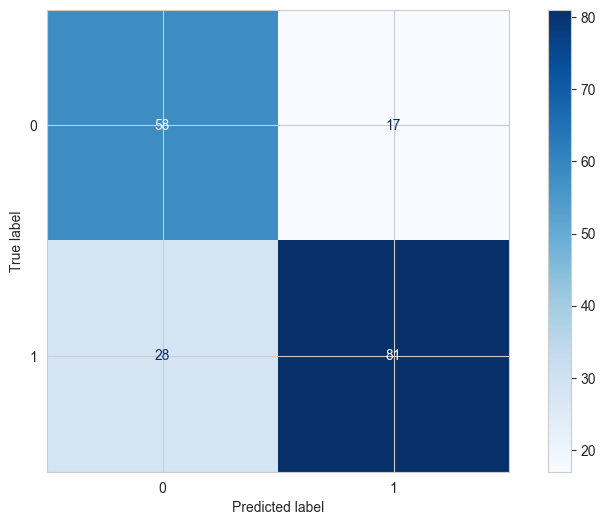

In [69]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best_dt)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [70]:
# Using the Random Forest algorithm 

# Initialize Random Forest Classifier with complex parameters
rf_model = RandomForestClassifier(
    n_estimators=100,            
    criterion='entropy',        
    max_depth=3,               
    min_samples_split=10,        
    min_samples_leaf=3,         
    max_features='sqrt',        
    random_state=42
)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

Accuracy: 0.8260869565217391
F1 Score: 0.8264259683023986
Precision: 0.8269629598357757
Recall: 0.8260869565217391
MAE: 0.17391304347826086
MSE: 0.17391304347826086
R2: 0.2797553516819571


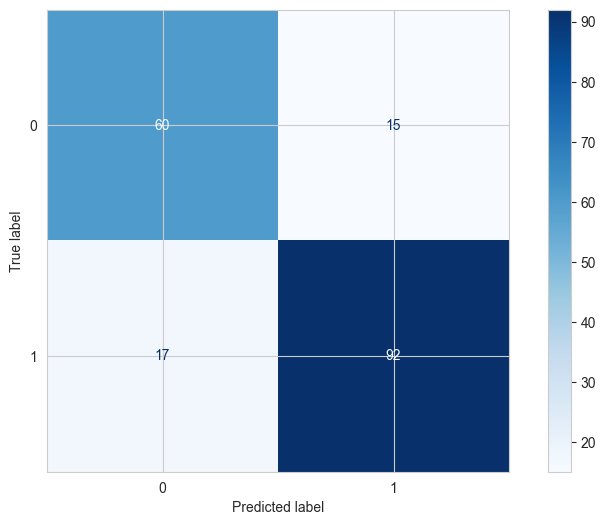

In [71]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.show()

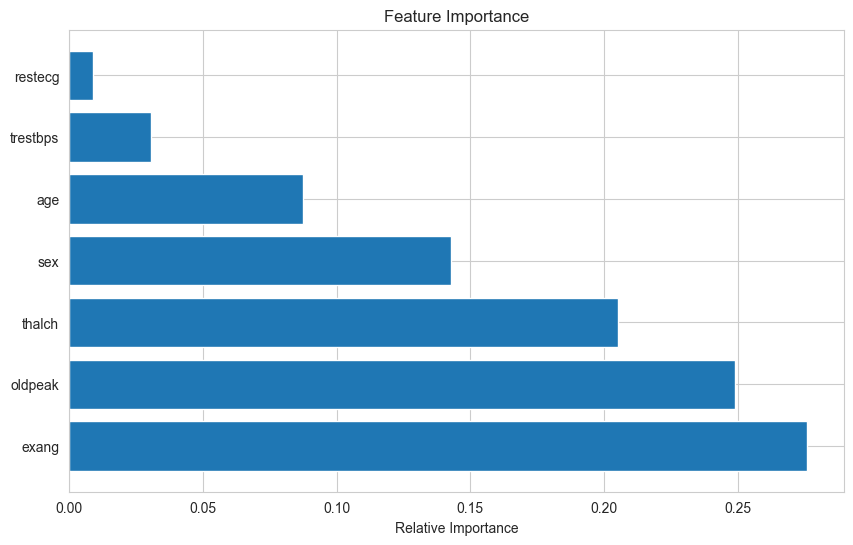

In [ ]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a bar chart
features = X.columns 
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(len(features)), feature_importances[indices], align='center')
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Accuracy: 0.8043478260869565
F1 Score: 0.8053417050545846
Precision: 0.8080530931945029
Recall: 0.8043478260869565
MAE: 0.1956521739130435
MSE: 0.1956521739130435
R2: 0.18972477064220172


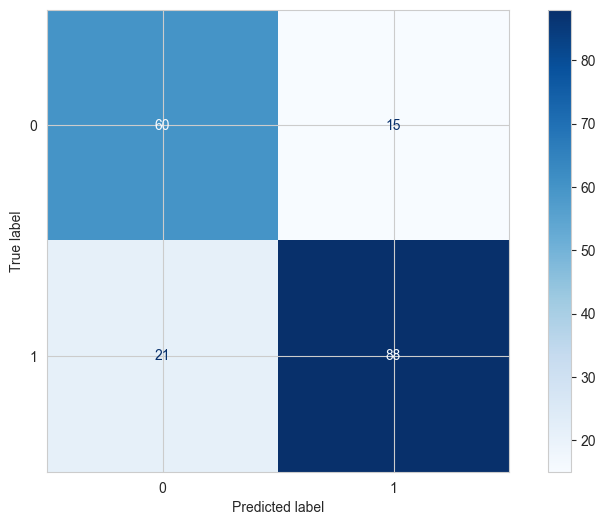

In [72]:
# AdaBoostClassifier 

# Initialize AdaBoost Classifier
ada_model = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=1,
    random_state=43
)
# Train the model
ada_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = ada_model.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [73]:
# GradientBoostingClassifier(display_labels=np.unique(y))
# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("MAE:", mae)
print("MSE:", mse)


Accuracy: 0.7663043478260869
F1 Score: 0.7682136374577936
Precision: 0.7777451828063241
Recall: 0.7663043478260869
MAE: 0.23369565217391305
MSE: 0.23369565217391305


In [74]:
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnx

# first save thee model in the pickle file 
import pickle
with open('./model/heart_disease_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print(f"✅ Model saved successfully at {'./model/heart_disease_model.pkl'}")


# Define input type for ONNX conversion
initial_type = [("float_input", FloatTensorType([None, X_train.shape[1]]))]
onnx_model = convert_sklearn(rf_model, initial_types=initial_type)

# Save the ONNX model
onnx_model_path = "./model/iot_heart_disease_model.onnx"
with open(onnx_model_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"✅ ONNX model saved successfully at {onnx_model_path}")


✅ Model saved successfully at ./model/heart_disease_model.pkl
✅ ONNX model saved successfully at ./model/iot_heart_disease_model.onnx


# Build a model using Neural Networks 

In this last code, the model will be built from scratch using Neural Networks


In [75]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_absolute_error, mean_squared_error



2025-03-14 11:19:19.724284: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [76]:


# Build the neural network model
model = Sequential([
    Dense(64, input_shape=(7,), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    # Output layer for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Use early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


model.summary()

# Train the model (using 20% of the training data for validation)
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=42,
                    validation_split=0.3,
                    callbacks=[early_stop],
                    verbose=1)

# Evaluate on the test set
y_pred_prob = model.predict(X_test_scaled)
# Convert probabilities to class labels (assuming threshold of 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("MAE:", mae)
print("MSE:", mse)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

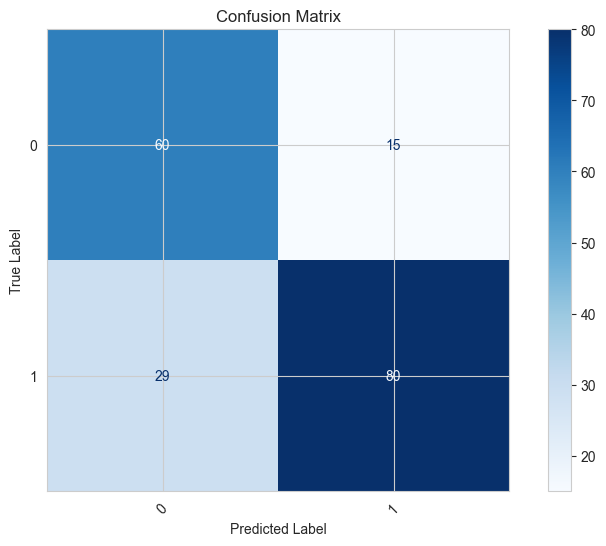

In [77]:
# create a confusion matrix  for the model 
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
# add labels to the confusion matrix
disp.ax_.set_xticklabels(disp.ax_.get_xticklabels(), rotation=45)
disp.ax_.set_yticklabels(disp.ax_.get_yticklabels(), rotation=0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


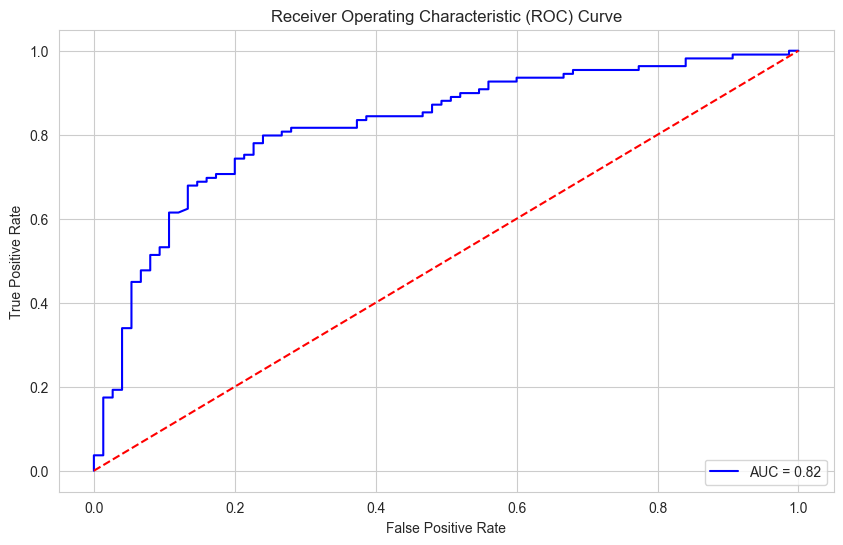

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

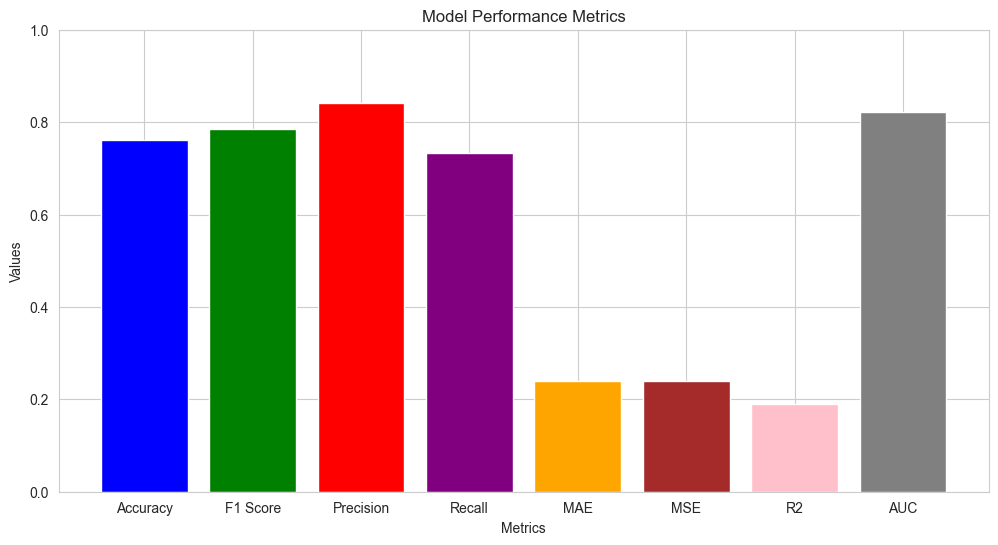

In [79]:
import matplotlib.pyplot as plt

# Define the metrics
metrics = {
    'Accuracy': accuracy,
    'F1 Score': f1,
    'Precision': precision,
    'Recall': recall,
    'MAE': mae,
    'MSE': mse,
    'R2': r2,
    'AUC': auc
}

# Plot the metrics
plt.figure(figsize=(12, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Performance Metrics')
plt.ylim(0, 1)  # Set y-axis limit to 1 for better visualization
plt.grid(True)
plt.show()

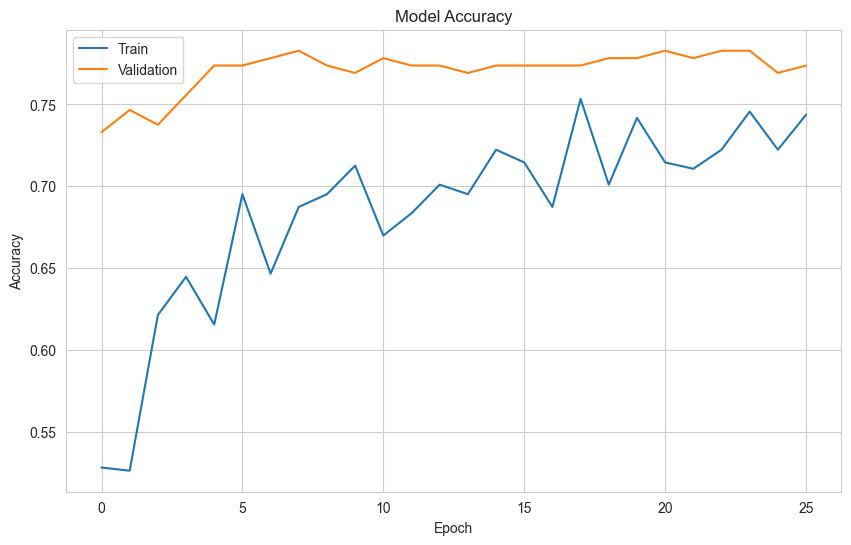

In [80]:
# plot the history to see how the model is trained

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Converting to TFLite

TFLite is the preferred way to use the trained model on the IOT device, so we shall need to convert it to TFLite


In [ ]:
# first we need to save the trained model, 
model.save('./model/heart_disease_model_tf.h5')

print(f"�� Model saved successfully at {'./model/heart_disease_model_tf.h5'}")


# save the model using pickle 
with open('./model/heart_disease_model_tf.pkl', 'wb') as f:
    pickle.dump(model, f)

print(f"�� Model saved successfully at {'./model/heart_disease_model_tf.pkl'}")

�� Model saved successfully at ./model/heart_disease_model_tf.h5
�� Model saved successfully at ./model/heart_disease_model_tf.pkl


In [ ]:
# Convert the trained Keras model to a TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Enable optimization (e.g., quantization)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open("../IoTCode/model/heart_disease_model.tflite", "wb") as f:
    f.write(tflite_model)

print("TFLite model saved successfully.")

INFO:tensorflow:Assets written to: /var/folders/yy/2rn2rrb9573_57tv1cf98bqr0000gn/T/tmp4mhnuvoh/assets


INFO:tensorflow:Assets written to: /var/folders/yy/2rn2rrb9573_57tv1cf98bqr0000gn/T/tmp4mhnuvoh/assets


TFLite model saved successfully.


2025-02-23 11:38:54.805787: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2025-02-23 11:38:54.806098: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2025-02-23 11:38:54.817926: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/yy/2rn2rrb9573_57tv1cf98bqr0000gn/T/tmp4mhnuvoh
2025-02-23 11:38:54.822389: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-02-23 11:38:54.822424: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/yy/2rn2rrb9573_57tv1cf98bqr0000gn/T/tmp4mhnuvoh
2025-02-23 11:38:54.836146: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2025-02-23 11:38:54.840804: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2025-02-23 11:38:55.126876: I tensorflow/cc/saved_model/loader.